# double_moving_average

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt

In [2]:
def load_financial_data(start_date, end_date,output_file):
    df = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    return df

In [4]:
goog_data=load_financial_data(start_date='2001-01-01', end_date='2021-01-01', output_file='goog_data_large.pkl')

In [5]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['Close'].\         # 단기 이동 평균 값
        rolling(window=short_window,
                min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['Close'].\          # 장기 이동 평균 값
        rolling(window=long_window,
                min_periods=1, center=False).mean()
    signals['signal'][short_window:] =\                       # 단기 이동 평균이 장기 이동 평균보다 높으면 참
        np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()              # 매수 주문 1, 매도 -1
    return signals

In [6]:
ts=double_moving_average(goog_data,20,100)                    

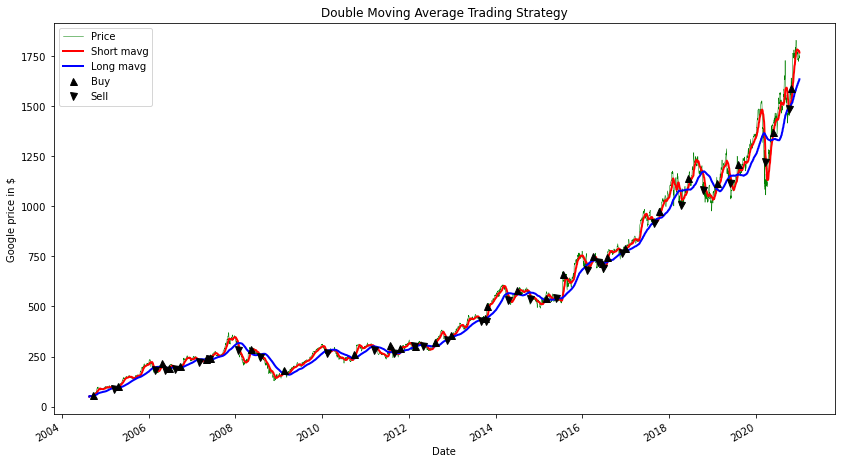

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)

ax1.plot(ts.loc[ts.orders== 1.0].index,
         goog_data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         goog_data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')
# plt.rcParams["figure.figsize"] = (14,8)
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Double Moving Average Trading Strategy")

plt.show()